In [11]:
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image
import keras
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

In [2]:
folder_train_benign="train/benign"
folder_train_malignant="train/malignant"
folder_test_benign="test/benign"
folder_test_malignant="test/malignant"

read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))




In [3]:
#load traning&test pic
imgs_train_benign=[read(os.path.join(folder_train_benign,filename) )for filename in os.listdir(folder_train_benign)]
X_benign = np.array(imgs_train_benign, dtype='uint8')

imgs_train_malignant=[read(os.path.join(folder_train_malignant,filename) )for filename in os.listdir(folder_train_malignant)]
X_malignant = np.array(imgs_train_malignant, dtype='uint8')

imgs_test_benign=[read(os.path.join(folder_test_benign,filename) )for filename in os.listdir(folder_test_benign)]
X_benign_test = np.array(imgs_test_benign, dtype='uint8')

imgs_test_malignant=[read(os.path.join(folder_test_malignant,filename) )for filename in os.listdir(folder_test_malignant)]
X_malignant_test = np.array(imgs_test_malignant, dtype='uint8')



In [4]:
#create labels
y_benign = np.zeros(X_benign.shape[0])
y_malignant = np.ones(X_malignant.shape[0])

y_benign_test = np.zeros(X_benign_test.shape[0])
y_malignant_test = np.ones(X_malignant_test.shape[0])



In [5]:
#merge data
X_train=np.concatenate((X_benign,X_malignant),axis=0)
y_train=np.concatenate((y_benign,y_malignant),axis=0)
X_test=np.concatenate((X_benign_test,X_malignant_test),axis=0)
y_test=np.concatenate((y_benign_test,y_malignant_test),axis=0)

print("train",y_train,"test",y_test[:5])

train [0. 0. 0. ... 1. 1. 1.] test [0. 0. 0. 0. 0.]


In [6]:
#shuffle data
s=np.arange(X_train.shape[0])
np.random.shuffle(s)
X_train=X_train[s]
y_train=y_train[s]

s=np.arange(X_test.shape[0])
np.random.shuffle(s)
X_test=X_test[s]
y_test=y_test[s]



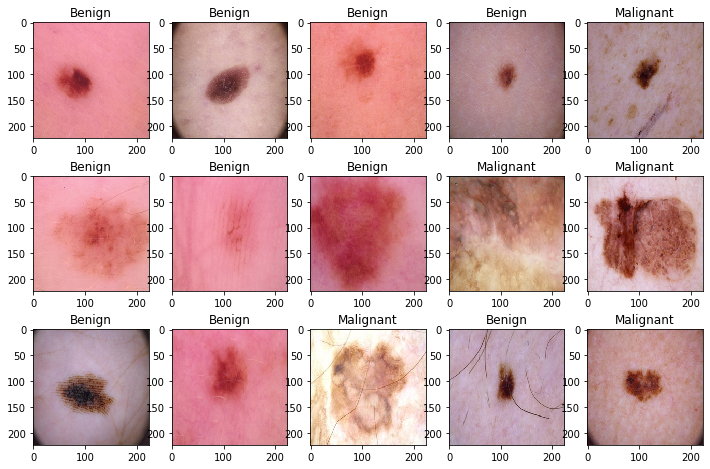

In [7]:
# Display first 15 images of moles, and how they are classified
w=40
h=30
fig=plt.figure(figsize=(12, 8))
columns = 5
rows = 3

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    if y_train[i] == 0:
        ax.title.set_text('Benign')
    else:
        ax.title.set_text('Malignant')
    plt.imshow(X_train[i], interpolation='nearest')
plt.show()

In [8]:
y_train = to_categorical(y_train, num_classes= 2)
y_test = to_categorical(y_test, num_classes= 2)
#print("train",y_train[:2],"test",y_test[:2])

In [9]:
X_train=X_train/255
X_test=X_test/255



In [12]:
#data augmentation
dag=ImageDataGenerator(
        featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
  rotation_range=,
    z
)